In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_theme(style = "whitegrid")

* datetime - hourly date + timestamp 
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

In [53]:
SEASON_TO_INDEX = {
    1: 'Primavera',
    2: 'Verão',
    3: 'Outono',
    4: 'Inverno'
}
WEATHER_TO_INDEX = {
    1: "Limpo/Parc. Nublado",
    2: "Neblina",
    3: "Neve/Chuvoso",
    4: "Chuva Forte/Neve",
}
INDEX_TO_SEASON = {
    1: 'Primavera',
    2: 'Verão',
    3: 'Outono',
    4: 'Inverno'
}
INDEX_TO_WEATHER = {
    1: "Limpo/Parc. Nublado",
    2: "Neblina",
    3: "Neve/Chuvoso",
    4: "Chuva Forte/Neve",
}

In [110]:
bikes = pd.read_csv("data/hour.csv").astype({"dteday": "datetime64[ns]"})
bikes.rename(columns={"hum":"humidity", "weather":"wheatersit" }, inplace=True)
bikes

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [55]:
bikes["season"] = bikes["season"].apply(lambda x: SEASON_TO_INDEX[x])
bikes["holiday"] = bikes["holiday"].apply(lambda x: "Sim" if x == 1 else "Não")
bikes["workingday"] = bikes["workingday"].apply(lambda x: "Sim" if x == 1 else "Não")
bikes["weathersit"] = bikes["weathersit"].apply(lambda x: WEATHER_TO_INDEX[x])

In [84]:
def plot_count_boxplot_per_category(bikes: pd.DataFrame, col: str, save: bool = True, plot: bool = False) -> plt.Figure:
    fig, ax = plt.subplots( figsize=(18, 8))
    
    Q2 = bikes["cnt"].quantile(.5)
    ax.axhline(Q2, color="k", linestyle="-.", lw=4)
    
    sns.boxplot(x=col, y="cnt", data=bikes, ax=ax)
    ax.legend([f"Mediana de cnt"], fontsize=35)

    #fig.suptitle(f"Boxplot por categorias da coluna {col}", weight='bold', fontsize=25)
    ax.set(xlabel=None)

    ax.xaxis.label.set_size(45)
    ax.yaxis.label.set_size(45)
    ax.xaxis.set_tick_params(labelsize=35)
    ax.yaxis.set_tick_params(labelsize=30)
    
    if save:
        fig.savefig(f"eda_plots/count_boxplot_per_{col}.png")

    if not plot:
        plt.close()
        
    return fig

In [68]:
def plot_category_frequency(bikes: pd.DataFrame, col: str, save: bool = True, plot: bool = False) -> plt.Figure:
    fig, ax = plt.subplots(figsize=(18, 8))
    sns.countplot(x=col, data=bikes)
    ax.set(xlabel=None)
    ax.set_ylabel('Frequência')
    #ax.set_title(f"Frequência de {col}", weight='bold', fontsize=25)

    ax.xaxis.label.set_size(45)
    ax.yaxis.label.set_size(45)
    ax.xaxis.set_tick_params(labelsize=30)
    ax.yaxis.set_tick_params(labelsize=30)

    if save:
        fig.savefig(f"eda_plots/frequency_{col}.png")
    if not plot:
        plt.close()
    return fig

In [92]:
def plot_histogram(bikes: pd.DataFrame, col: str, save: bool = True, plot: bool = False) -> plt.Figure:
    fig, ax = plt.subplots(figsize=(18, 8))
    sns.histplot(bikes[col],  ax=ax, kde = True)
    ax.set(xlabel=None)
    ax.set_ylabel("Frequência")
    #ax.set_title(f"Histograma de {col}", weight='bold', fontsize=25)

    Q2 = bikes[col].quantile(.5)
    mean = bikes[col].mean()

    ax.axvline(Q2, color="r", linestyle="-.", lw=4)
    ax.axvline(mean, color="k", linestyle="-.", lw=4)

    ax.legend([f"EDK", f"Mediana ({Q2:.2f})", f"Média ({mean:.2f})"], fontsize=35)

    ax.xaxis.label.set_size(45)
    ax.yaxis.label.set_size(45)
    ax.xaxis.set_tick_params(labelsize=35)
    ax.yaxis.set_tick_params(labelsize=30)

    if save:
        fig.savefig(f"eda_plots/histogram_{col}.png")
    if not plot:
        plt.close()
    return fig

In [24]:
def create_bins(series: pd.Series, n_bins = 10) -> pd.Series:
    return pd.cut(series, bins=np.linspace(series.min() - 1e-7, series.max(), n_bins + 1))

In [25]:
def plot_count_boxplot_per_bin(
    bikes: pd.DataFrame, col: str, n_bins=10, save=True, plot=False
):
    fig, ax = plt.subplots(figsize=(18, 8))
    ax.set_title(f"Boxplot do atributo count por partições de {col}", weight='bold', fontsize=25)
    
    Q2 = bikes["count"].quantile(0.5)
    data = bikes.copy()

    data["binned"] = create_bins(data[col], n_bins=n_bins)
    data["binned_left"] = data["binned"].apply(lambda x: x.left).astype(int)
    data["binned_right"] = data["binned"].apply(lambda x: x.right).astype(int)
    l = sorted(data["binned_left"].unique())
    r = sorted(data["binned_right"].unique())
    xlabels = [f"{l[i]}-{r[i]}" for i in range(len(l))]
    
    sns.boxplot(x="binned_left", y="count", data=data, ax=ax)
    ax.axhline(Q2, color="k", linestyle="--")

    ax.set_xticklabels(xlabels, fontsize=20)
    ax.set_xlabel(f"Particições de {col}", fontsize=20)
    ax.yaxis.label.set_size(20)
    ax.yaxis.set_tick_params(labelsize=20)

    if save:
        fig.savefig(f"eda_plots/count_boxplot_per_{col}_bin.png")
    
    if not plot:
        plt.close()

    return fig

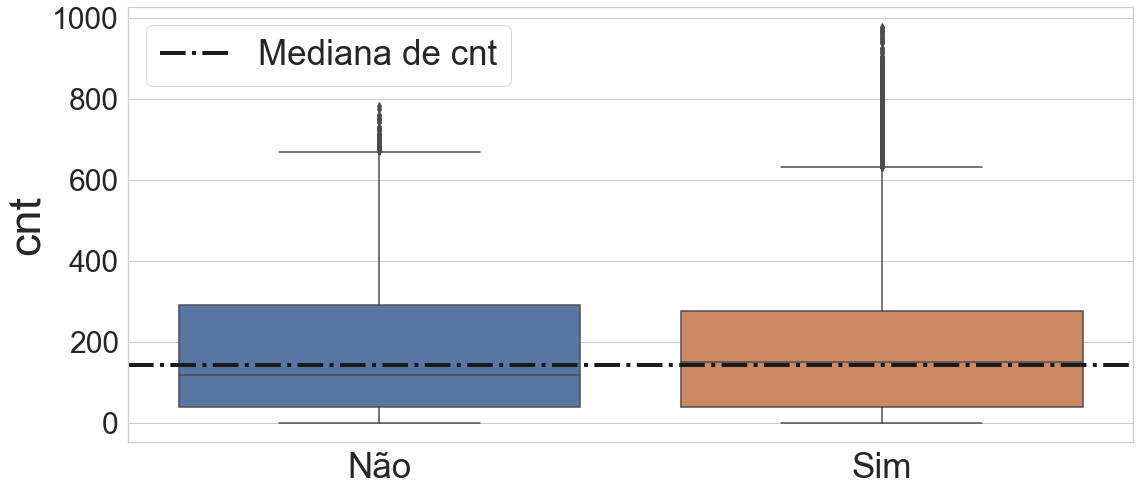

In [85]:
plot_count_boxplot_per_category(bikes, "workingday")

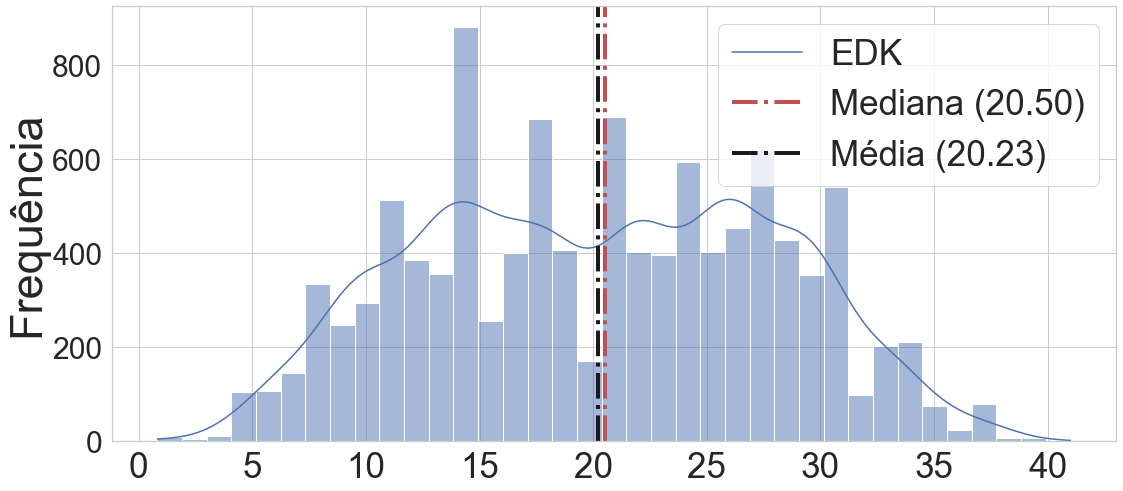

In [105]:
plot_histogram(bikes, "temp")

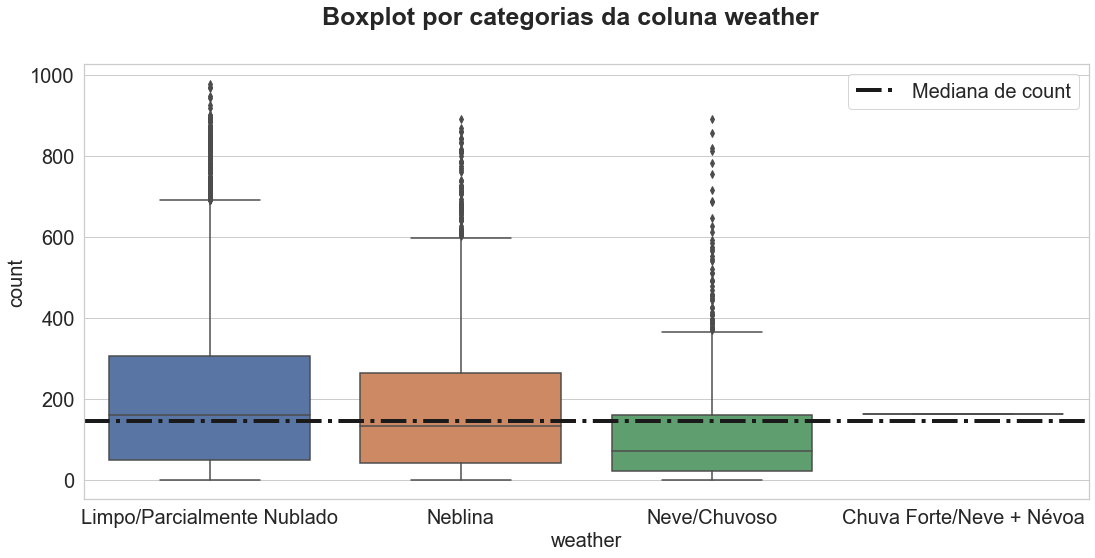

In [13]:
plot_count_boxplot_per_category(bikes, "season")
plot_count_boxplot_per_category(bikes, "holiday")
plot_count_boxplot_per_category(bikes, "workingday")
plot_count_boxplot_per_category(bikes, "weather")

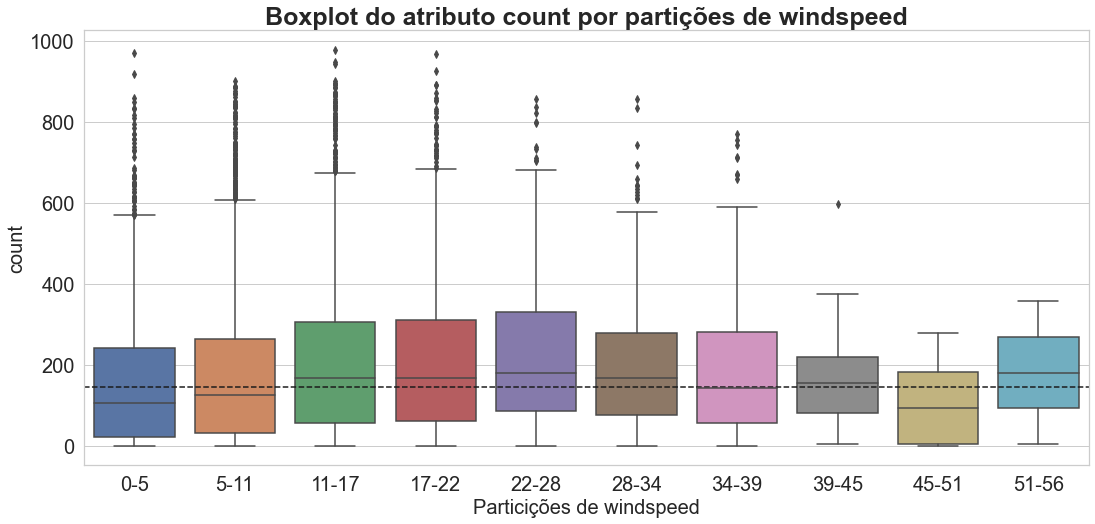

In [14]:
plot_count_boxplot_per_bin(bikes, "temp", n_bins=10)
plot_count_boxplot_per_bin(bikes, "atemp", n_bins=10)
plot_count_boxplot_per_bin(bikes, "humidity", n_bins=10)
plot_count_boxplot_per_bin(bikes, "windspeed", n_bins=10)

In [15]:
def plot_multivariable_scatterplot(bikes: pd.DataFrame, hue: str, save: bool = True, plot: bool = False) -> plt.Figure:
    fig = sns.pairplot(df, hue=hue, vars=['temp','atemp','humidity','windspeed','casual','registered','count'])
    if save:
        fig.savefig(f"eda_plots/matrix_scatterplot_{hue}.png")
    if not plot:
        plt.close()
    return fig

In [ ]:
df = pd.read_csv("data/train.csv").astype({"datetime": "datetime64[ns]"})
plot_multivariable_scatterplot(df, "season", plot=True)
plot_multivariable_scatterplot(df, "holiday", plot=True)
plot_multivariable_scatterplot(df, "workingday", plot=True)
plot_multivariable_scatterplot(df, "weather", plot=True)

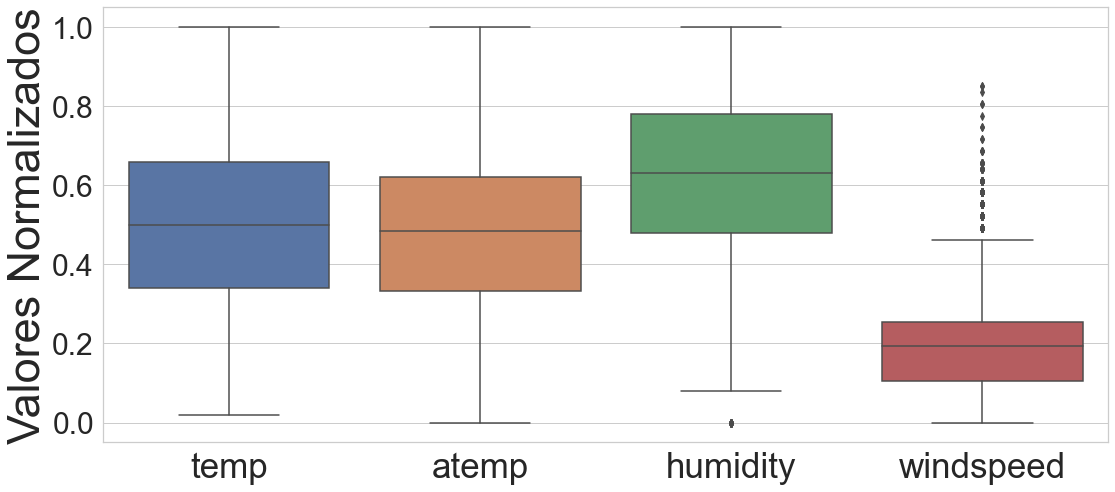

In [121]:
db = bikes[["temp", "atemp", "humidity", "windspeed"]]
db = pd.melt(db)
fig, ax = plt.subplots( figsize=(18, 8))

sns.boxplot(x="variable", y="value", data=db, ax=ax)

#fig.suptitle(f"Boxplot por categorias da coluna {col}", weight='bold', fontsize=25)
ax.set(xlabel=None)
ax.set_ylabel("Valores Normalizados")

ax.xaxis.label.set_size(45)
ax.yaxis.label.set_size(45)
ax.xaxis.set_tick_params(labelsize=35)
ax.yaxis.set_tick_params(labelsize=30)

,variable,value
0,temp,0.2400
1,temp,0.2200
2,temp,0.2200
3,temp,0.2400
4,temp,0.2400
...,...,...
69511,windspeed,0.1642
69512,windspeed,0.1642
69513,windspeed,0.1642
69514,windspeed,0.1343
